## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')
sns.set_theme(palette='ocean_r')
cat_palette = sns.color_palette('tab20c')
cat_palette[4:7] = cat_palette[4:7][::-1]

## Data loading

In [2]:
df = pd.read_parquet('clean_data.parquet')

## Data analysis

### General

Statistics

In [3]:
df.describe()

,price,expenses,total_surface,covered_surface,rooms,has_balcony,has_terrace,has_garage,is_studio_apartment,has_balcony_and_terrace
count,480.000000,403.000000,480.000000,480.000000,459.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,19830.270833,4704.397022,51.118750,48.766667,2.246187,0.562500,0.035417,0.077083,0.075000,0.020833
std,6909.330031,1894.816313,17.299899,16.587332,0.952107,0.496596,0.185023,0.267002,0.263666,0.142975
min,8500.000000,1200.000000,17.000000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15500.000000,3600.000000,42.000000,40.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17500.000000,4300.000000,45.000000,45.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,23000.000000,5500.000000,55.000000,50.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,47000.000000,12500.000000,200.000000,200.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Missing values

In [4]:
df.isna().sum()

title                       0
description                 2
extras                      0
price                       0
expenses                   77
location                    1
link                        0
total_surface               0
covered_surface             0
rooms                      21
has_balcony                 0
has_terrace                 0
has_garage                  0
is_studio_apartment         0
has_balcony_and_terrace     0
balcony_and_terrace         0
dtype: int64

### Visualizations

Price distribution

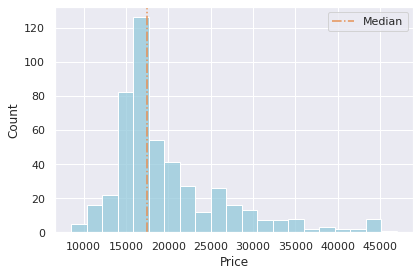

In [5]:
f, ax = plt.subplots()
sns.histplot(data=df, x='price', ax=ax)

ax.set_xlabel('Price')
ax.axvline(df['price'].median(), label='Median', ls='-.', color='#E59155')
ax.legend()

plt.tight_layout()
f.savefig('./images/price_distribution.png')

Expenses distribution

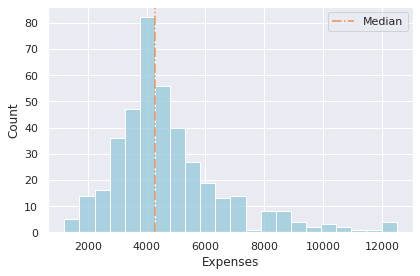

In [6]:
f, ax = plt.subplots()
sns.histplot(data=df, x='expenses', ax=ax)

ax.set_xlabel('Expenses')
ax.axvline(df['expenses'].median(), label='Median', ls='-.', color='#E59155')
ax.legend()

plt.tight_layout()
f.savefig('./images/expenses_distribution.png')

Price and expenses

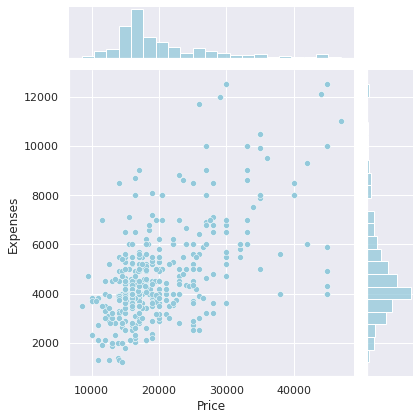

In [7]:
g = sns.jointplot(data=df, x='price', y='expenses')

g.set_axis_labels('Price', 'Expenses')

plt.tight_layout()
g.savefig('./images/prices_and_expenses.png')

Total surface distribution

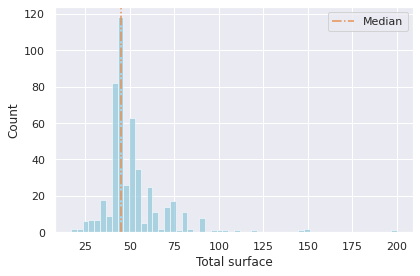

In [8]:
f, ax = plt.subplots()
sns.histplot(data=df, x='total_surface', ax=ax)

ax.set_xlabel('Total surface')
ax.axvline(df['total_surface'].median(), label='Median', ls='-.', color='#E59155')
ax.legend()

plt.tight_layout()
f.savefig('./images/total_surface_distribution.png')

Total surface and price relation

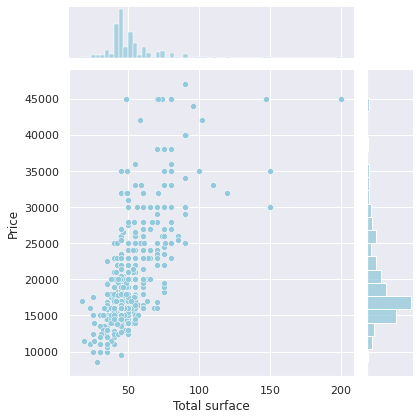

In [9]:
g = sns.jointplot(data=df, x='total_surface', y='price')

g.set_axis_labels('Total surface', 'Price')

plt.tight_layout()
g.savefig('./images/total_surface_and_price.png')

Prices depending on balcony and terrace

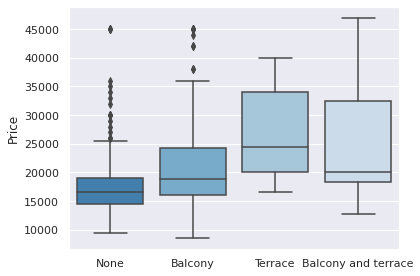

In [10]:
f, ax = plt.subplots()
sns.boxplot(
    data=df,
    x='balcony_and_terrace',
    y='price',
    ax=ax,
    order=['none', 'balcony', 'terrace', 'balcony_and_terrace'],
    palette=cat_palette
)

ax.set_xticklabels(['None', 'Balcony', 'Terrace', 'Balcony and terrace'])
ax.set_xlabel('')
ax.set_ylabel('Price')

plt.tight_layout()
f.savefig('./images/prices_and_balcony_terrace.png')

Number of rooms

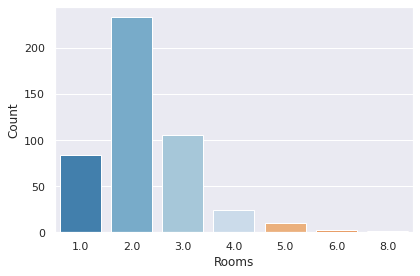

In [11]:
f, ax = plt.subplots()

sns.countplot(data=df, x='rooms', palette=cat_palette)
ax.set_xlabel('Rooms')
ax.set_ylabel('Count')

plt.tight_layout()
f.savefig('./images/rooms_count.png')

Total surface per number of rooms

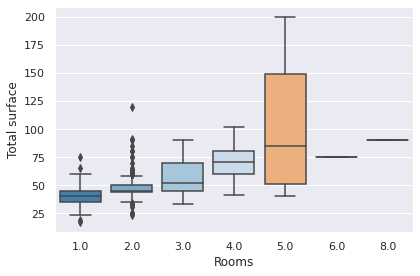

In [12]:
f, ax = plt.subplots()
sns.boxplot(
    data=df,
    x='rooms',
    y='total_surface',
    ax=ax,
    palette=cat_palette
)

ax.set_xlabel('Rooms')
ax.set_ylabel('Total surface')

plt.tight_layout()
f.savefig('./images/total_surface_and_rooms.png')

Price per number of rooms

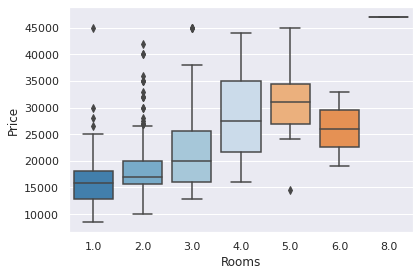

In [13]:
f, ax = plt.subplots()
sns.boxplot(
    data=df,
    x='rooms',
    y='price',
    ax=ax,
    palette=cat_palette
)

ax.set_xlabel('Rooms')
ax.set_ylabel('Price')

plt.tight_layout()
f.savefig('./images/price_and_rooms.png')

Total surface and price relation by number of rooms

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


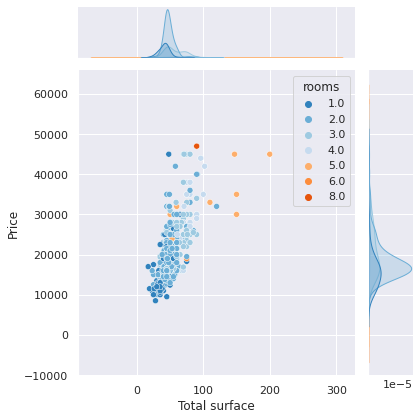

In [14]:
g = sns.jointplot(
    data=df.query('rooms.notna()', engine='python'),
    x='total_surface',
    y='price',
    hue='rooms',
    palette=cat_palette[:7],
)

g.set_axis_labels('Total surface', 'Price')
plt.tight_layout()
g.savefig('./images/total_surface_and_price_and_rooms.png')